### WGCNA

Looking for modules of coexpressed transcripts in the variance stabilized transformed count data from `DESeq2` and relating them to trait data (i.e. infection status, range, etc.). Here are some good resources for learning more about how to apply WGCNA to our data set:

[WGCNA tutorials](https://horvath.genetics.ucla.edu/html/CoexpressionNetwork/Rpackages/WGCNA/Tutorials/)

[Harvard WGCNA walkthrough](http://pklab.med.harvard.edu/scw2014/WGCNA.html)

Peter Langfelder blog posts: [categorical data](https://peterlangfelder.com/2018/11/25/working-with-categorical-variables/), [signed vs. unsigned](https://peterlangfelder.com/2018/11/25/signed-or-unsigned-which-network-type-is-preferable/), [signed vs. signed hybrid](https://peterlangfelder.com/2018/11/25/__trashed/)

[Matz lab code](https://github.com/sbarfield/tagSeq-commonGarden/blob/master/WGCNA_common_garden.r)

If you have already performed module construction (steps `adjacency()`, `TOMsimilarity()`, and `flashClust()`) and saved the output (`dissTOM` and `geneTree`), you can skip all steps through module construction and load in saved objects for downstream use.

Load in the package.

In [1]:
require(flashClust)
require(WGCNA)

Loading required package: flashClust

Attaching package: ‘flashClust’

The following object is masked from ‘package:stats’:

    hclust

Loading required package: WGCNA
Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: ‘fastcluster’

The following object is masked from ‘package:flashClust’:

    hclust

The following object is masked from ‘package:stats’:

    hclust



Attaching package: ‘WGCNA’

The following object is masked from ‘package:stats’:

    cor



Read in the data. 

In [2]:
vsd <- read.table("../outputs/WGCNA_FP_in.tsv", sep="\t")

Take a look.

In [3]:
head(vsd)
dim(vsd)

,AP_C_1,AP_C_2,AP_C_3,AP_C_4,AP_C_5,AP_P_1,AP_P_2,AP_P_3,AP_P_6,FP_C_10,...,NJ_P_7,SC_C_12,SC_C_14,SC_C_2,SC_C_6,SC_C_7,SC_C_9,SC_P_1,SC_P_2,SC_P_3
TRINITY_DN38930_c0_g1_i1,6.443681,7.205313,6.078079,5.901777,5.890280,6.191167,6.198992,6.709321,6.133734,6.868830,...,6.181947,5.391657,6.109502,6.835790,5.450940,5.634931,5.678353,5.990073,7.003240,5.954857
TRINITY_DN27848_c0_g1_i1,5.144260,6.331020,4.844440,5.346441,6.119959,3.957132,5.639363,1.543163,5.877964,5.307922,...,4.576993,5.416063,5.188820,4.635611,5.306120,5.271808,5.409402,5.576980,2.642515,5.526421
TRINITY_DN97607_c0_g1_i1,2.433366,4.698268,2.526050,3.150503,4.280737,2.545499,3.452081,1.543163,3.423439,3.017329,...,4.355020,3.999096,2.286875,2.486614,3.676475,2.580464,3.715312,3.708147,2.642515,2.926038
TRINITY_DN134395_c0_g1_i1,6.622175,6.774247,3.413433,3.468955,5.179459,2.934780,1.543163,3.253676,1.543163,6.889171,...,3.761693,2.917608,6.075968,4.972024,2.519255,5.490432,3.076698,2.324873,3.064321,3.795363
TRINITY_DN144418_c0_g1_i1,6.671677,7.374388,5.272236,6.760784,7.067044,5.400327,6.541144,3.587580,7.686177,6.496945,...,7.115959,7.212743,4.791362,5.030671,6.462423,5.329680,6.871519,7.322696,3.818151,6.484083
TRINITY_DN58245_c0_g1_i1,3.041381,4.053555,2.526050,2.951670,4.014014,3.447176,3.452081,1.543163,2.355502,3.175501,...,4.161573,3.858989,3.799944,2.486614,2.899536,3.793440,3.944735,3.486481,1.543163,2.926038


[1] 67076    77

Looks good. Now let's transpose it.

In [4]:
vsd <- t(vsd)
vsd[1:6,1:6]
dim(vsd)

,TRINITY_DN38930_c0_g1_i1,TRINITY_DN27848_c0_g1_i1,TRINITY_DN97607_c0_g1_i1,TRINITY_DN134395_c0_g1_i1,TRINITY_DN144418_c0_g1_i1,TRINITY_DN58245_c0_g1_i1
AP_C_1,6.443681,5.144260,2.433366,6.622175,6.671677,3.041381
AP_C_2,7.205313,6.331020,4.698268,6.774247,7.374388,4.053555
AP_C_3,6.078079,4.844440,2.526050,3.413433,5.272236,2.526050
AP_C_4,5.901777,5.346441,3.150503,3.468955,6.760784,2.951670
AP_C_5,5.890280,6.119959,4.280737,5.179459,7.067044,4.014014
AP_P_1,6.191167,3.957132,2.545499,2.934780,5.400327,3.447176


[1]    77 67076

Now we check to see if there are any genes or samples with too many missing values.

In [5]:
gsg = goodSamplesGenes(vsd, verbose = 3)
gsg$allOK

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

Good. Now we'll cluster the samples to identify outliers.

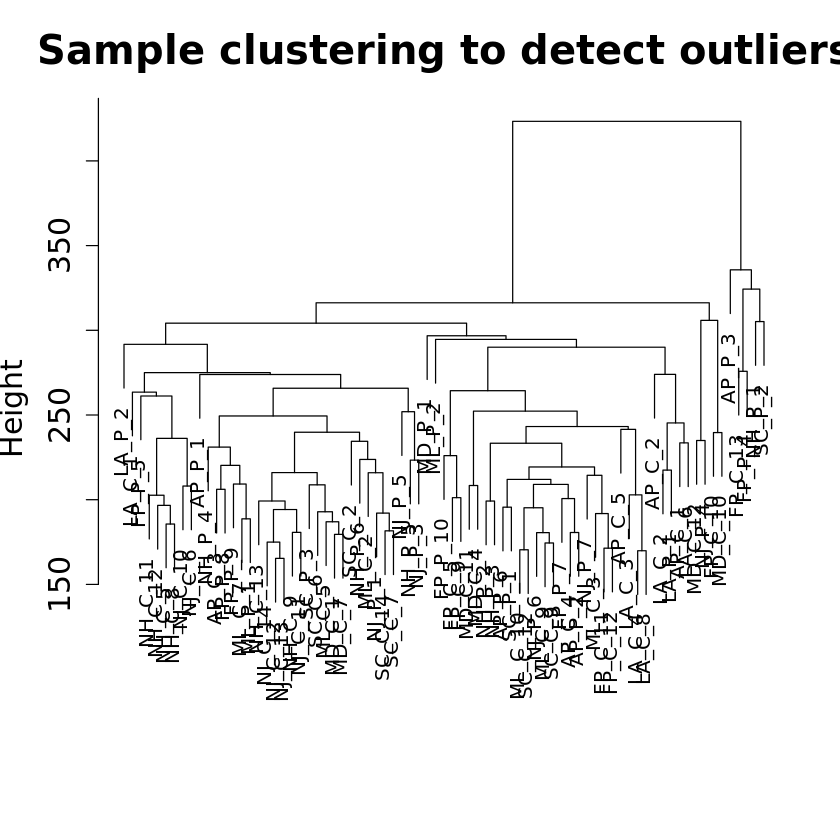

In [6]:
tree = hclust(dist(vsd), method = "average");
plot(tree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5,
cex.axis = 1.5, cex.main = 2)

Nothing looks too out of the ordinary to get chucked out. Note that this count data already excludes the outliers we removed in DESeq2 (MA control crabs and AP_C_6)

Now we'll load in the sample metadata (same as coldata in DESeq2 analysis).

In [7]:
coldata <- read.table("../metadata/DESeq2_coldata.txt", row.names=1, col.names=c("","site","condition","range","sex"), stringsAsFactors = FALSE)
coldata <- coldata[rownames(vsd),]
head(coldata)
dim(coldata)

,site,condition,range,sex
AP_C_1,AP,C,Native,F
AP_C_2,AP,C,Native,F
AP_C_3,AP,C,Native,M
AP_C_4,AP,C,Native,M
AP_C_5,AP,C,Native,M
AP_P_1,AP,P,Native,F


[1] 77  4

The data in this data.frame are all of class 'character' and represent categorical variables. WGCNA was originally constructed to look for correlations between expression modules and numeric trait data (i.e. levels of some disease biomarker, etc). Fortunately, the creators included functions to binarize combinations of categorical data so that we can compare among groups. We will use these later when looking more in depth at comparisons among specific combinations of variables (i.e. range and infection status). The initial comparison will be of just parasitized vs. uninfected, which, being binary, is easy to transform.  We'll subset the coldata to just include the condition and binarize it.

In [8]:
coldata_PvC <- coldata[,2,drop=FALSE]
coldata_PvC$condition[coldata_PvC$condition=='P'] <- 1
coldata_PvC$condition[coldata_PvC$condition=='C'] <- 0
coldata_PvC$condition <- as.numeric(coldata_PvC$condition)
head(coldata_PvC,10)

,condition
AP_C_1,0
AP_C_2,0
AP_C_3,0
AP_C_4,0
AP_C_5,0
AP_P_1,1
AP_P_2,1
AP_P_3,1
AP_P_6,1
FP_C_10,0


Okay looks good. Now we'll have a look at the tree with the infection state colored across samples.

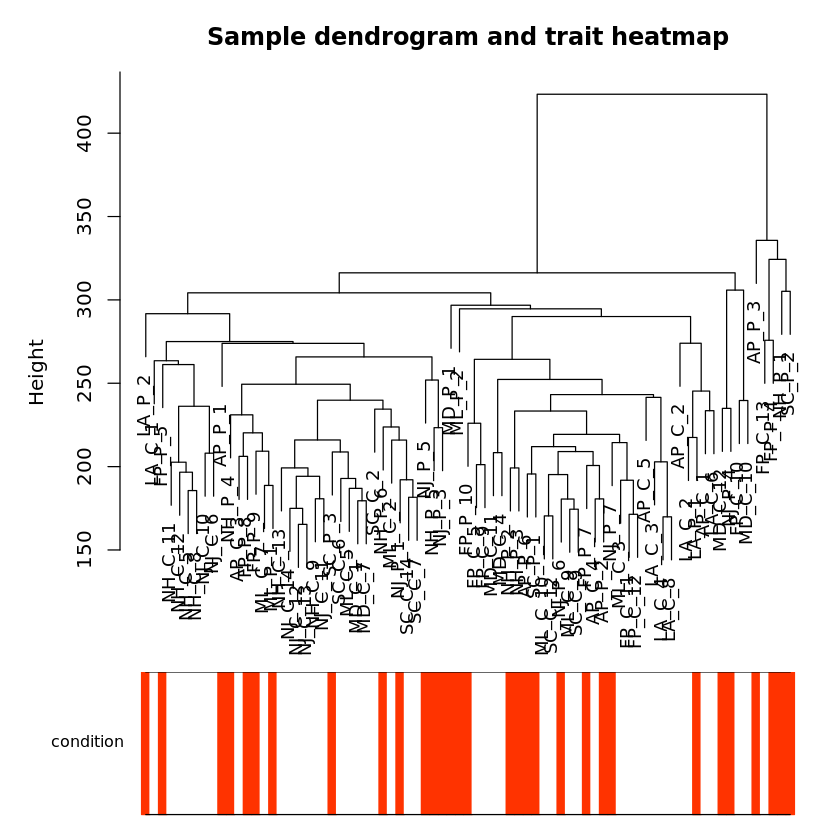

In [9]:
tree2 = hclust(dist(vsd), method = "average")
traitColors = numbers2colors(coldata_PvC, signed = FALSE)
plotDendroAndColors(tree2, traitColors,
    groupLabels = names(coldata_PvC),
    main = "Sample dendrogram and trait heatmap")

Again, as we saw earlier, the samples don't cluster according to infection status when starting from a distance matrix created from the entire matrix of counts. There is just so much other variation present in the data that infection status doesn't stand out so much. This analysis should help resolve which co-expressed groups of transcripts are related to infection status. 

Now we're set up, let's start the actually calculations. First we'll enable multi-threading.

In [10]:
enableWGCNAThreads()

Allowing parallel execution with up to 35 working processes.


Then we'll start with actually performing these calculations. Note that these requires a lot of memory. Make sure to request as much memory as possible when starting up your `srun` session. I requested 24 threads and 180gb RAM. Probably overkill, but I didn't get booted off the node. 

In [11]:
sft = pickSoftThreshold(vsd, verbose = 5, networkType="signed")

pickSoftThreshold: will use block size 666.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 666 of 67076
   ..working on genes 667 through 1332 of 67076
   ..working on genes 1333 through 1998 of 67076
   ..working on genes 1999 through 2664 of 67076
   ..working on genes 2665 through 3330 of 67076
   ..working on genes 3331 through 3996 of 67076
   ..working on genes 3997 through 4662 of 67076
   ..working on genes 4663 through 5328 of 67076
   ..working on genes 5329 through 5994 of 67076
   ..working on genes 5995 through 6660 of 67076
   ..working on genes 6661 through 7326 of 67076
   ..working on genes 7327 through 7992 of 67076
   ..working on genes 7993 through 8658 of 67076
   ..working on genes 8659 through 9324 of 67076
   ..working on genes 9325 through 9990 of 67076
   ..working on genes 9991 through 10656 of 67076
   ..working on genes 10657 through 11322 of 67076
   ..working on genes 11323 through 11988 of 67076
   ..work

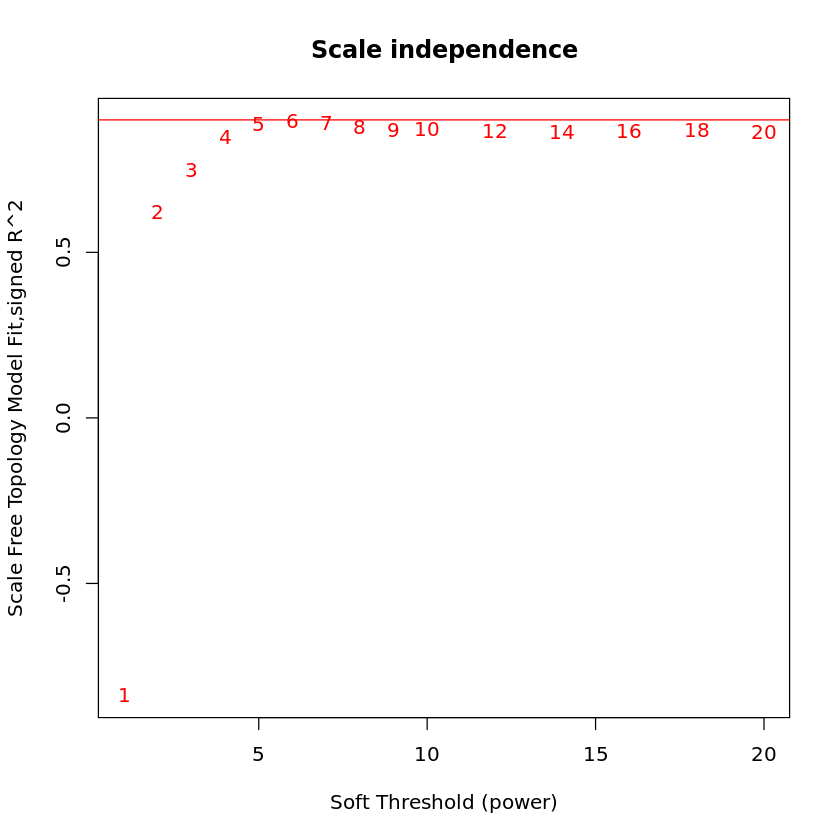

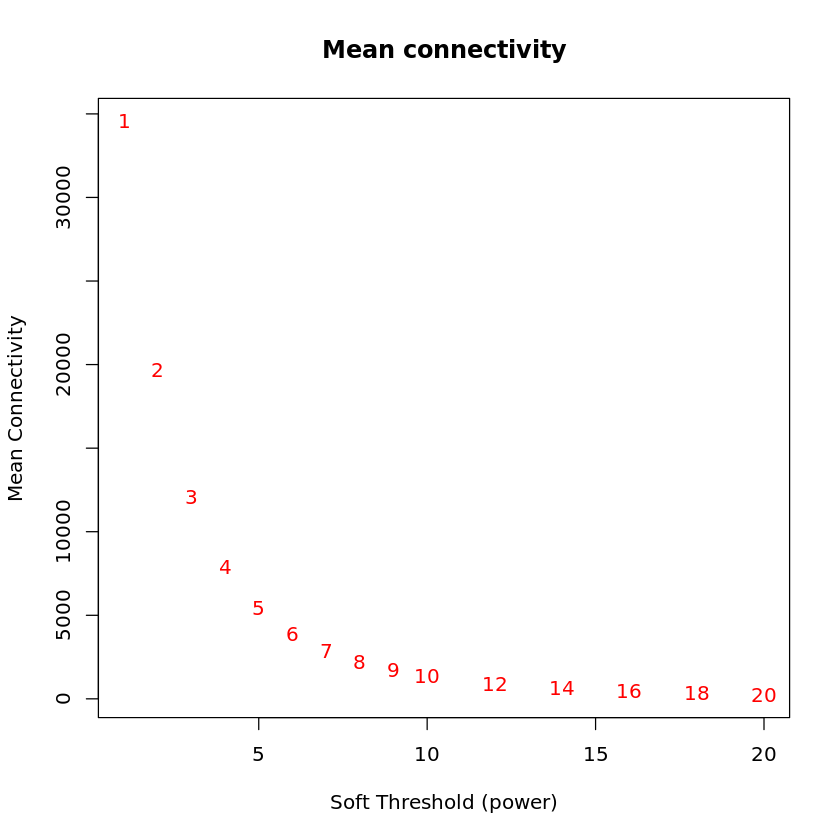

In [12]:
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
    xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
    main = paste("Scale independence"))
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
    labels=c(seq(1, 10, by = 1), seq(12, 20, by = 2)),col="red") #labels from default for power vector
abline(h=0.90,col="red")
plot(sft$fitIndices[,1], sft$fitIndices[,5],
    xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
    main = paste("Mean connectivity"))
    text(sft$fitIndices[,1], sft$fitIndices[,5], labels=c(seq(1, 10, by = 1), seq(12, 20, by = 2)), col="red")

We are going to pick a power of 6, as it is the first value to reach the plateau at ~0.9, as [recommended](https://horvath.genetics.ucla.edu/html/CoexpressionNetwork/Rpackages/WGCNA/Tutorials/FemaleLiver-02-networkConstr-auto.pdf). It's also the highest value overall, as the $r^{2}$ drops after a power of 6. 

Now we'll do the module construction. 

In [ ]:
adjacency = adjacency(vsd, power = 6,type="signed")
TOM = TOMsimilarity(adjacency,TOMType="signed")
dissTOM = 1-TOM
geneTree = flashClust(as.dist(dissTOM), method = "average")
save(dissTOM,geneTree,file="modules.RData")

In [ ]:
#net = blockwiseModules(vsd, power = 6,
#    TOMType = "unsigned", minModuleSize = 30,
#    reassignThreshold = 0, mergeCutHeight = 0.25,
#    numericLabels = TRUE, pamRespectsDendro = FALSE,
#    saveTOMs = TRUE, networkType = "signed",
#    verbose = 3, maxBlockSize = 70000
#)

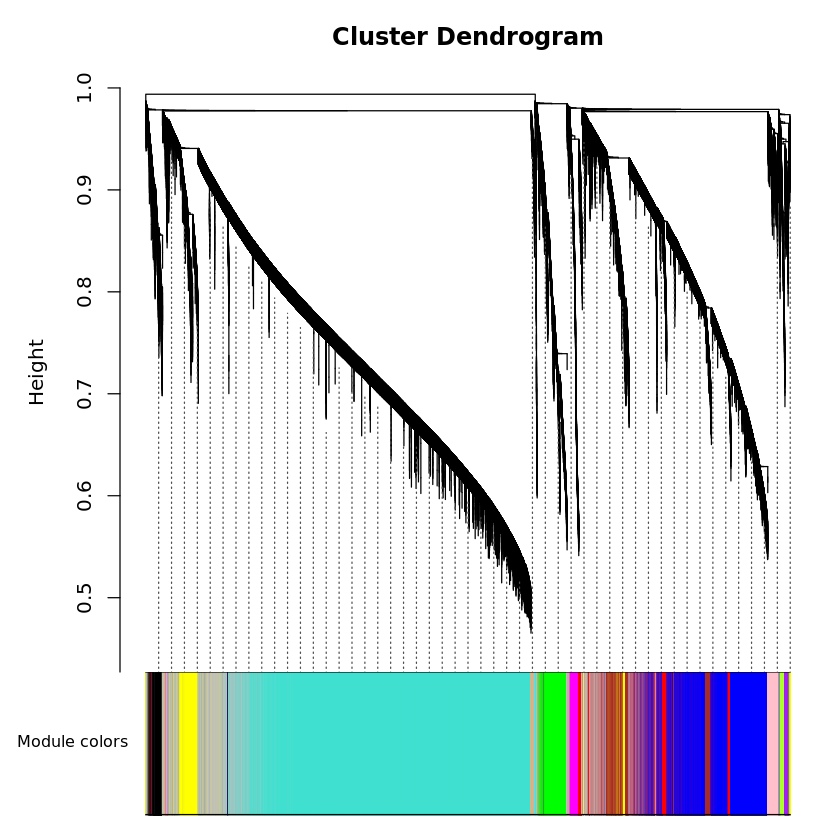

In [16]:
# open a graphics window
#sizeGrWindow(12, 9)
# Convert labels to colors for plotting
mergedColors = labels2colors(net$colors)
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

We're going to want to have a column that indicates the combination of range and condition. 

USE PASTE!